# LAB02 Preliminary



In [9]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

data = pd.read_csv("census.csv")

display(data.head(n=1))
df = pd.DataFrame(data)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Exercise 0:

In [10]:
# The total number of records
n_records=df.shape[0]
n_records

45222

In [11]:
# The number of individuals making more than $50000 annually

n_greater_50k=df[df['income']=='>50K']
len(n_greater_50k)             

11208

In [12]:
# The number of individuals making at most $50000 annually
n_at_most_50K=df[df['income']=='<=50K']
len(n_at_most_50K)

34014

In [14]:
# The percentage of individuals making at more than $50000 annually
greater_percent=len(n_greater_50k)/(len(n_at_most_50K)+len(n_greater_50k))*100
print(greater_percent)
#print(df.columns.values)
print(list(df))
print(df['age'].unique())
print(df['workclass'].unique())
print(df['education_level'].unique())
print(df['education-num'].unique())
print(df['marital-status'].unique())
print(df['occupation'].unique())
print(df['relationship'].unique())
print(df['race'].unique())
print(df['sex'].unique())
print(df['capital-gain'].unique())
print(df['capital-loss'].unique())
print(df['hours-per-week'].unique())
print(df['native-country'].unique())
print(df['income'].unique())

24.78439697492371
['age', 'workclass', 'education_level', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
[39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
[13.  9.  7. 14.  5. 10. 12.  4. 16. 11. 15.  3.  6.  1.  8.  2.]
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'

### End of exercise 0:

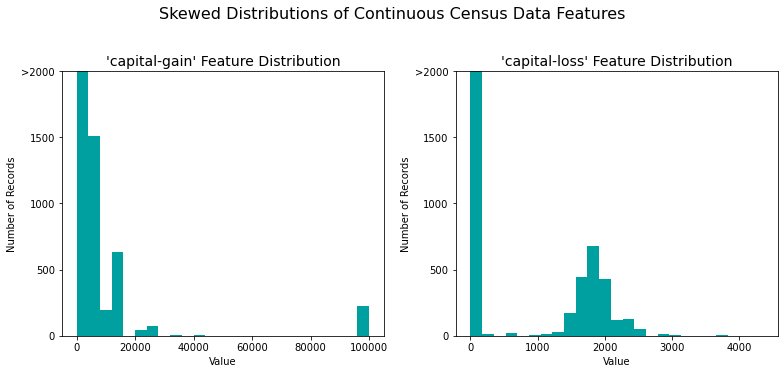

In [6]:
# Split the data into features and target labels
income_raw = data['income']
features_raw = data.drop('income', axis = 1)
# Visualize skewed continuous features of original data
vs.distribution(data)

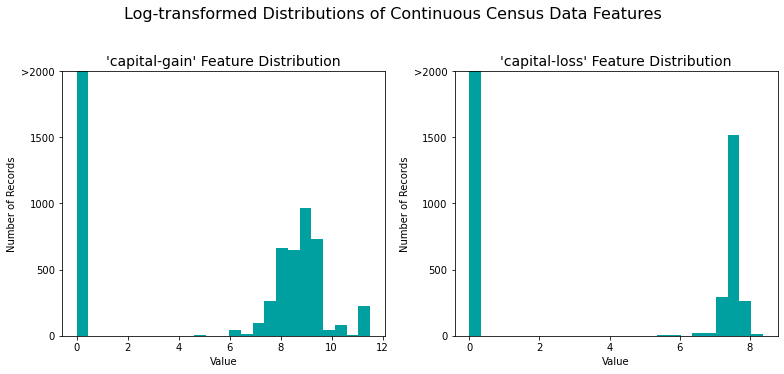

In [8]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

In [9]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, than apply it to the features
scaler = MinMaxScaler()  # default=(0,1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))
#features_log_minmax_transform.head(n = 5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Exercise 1:

In [15]:
# Perform one-hot encoding on the data
df_onehot=pd.get_dummies(df);
df_onehot

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_<=50K,income_>50K
0,39,13.0,2174.0,0.0,40.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,13.0,0.0,0.0,13.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,38,9.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,7.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,13.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,13.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
45218,39,13.0,0.0,0.0,36.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
45219,38,13.0,0.0,0.0,50.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
45220,44,13.0,5455.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [16]:
# Convert the target label ‘income_raw’ to numerical entries (set records with “<=50k” to 0 and records with “>50k” to 1)
def bug(frame):
    result=0
    if frame=='>50K':
        result=1
    return result
df_onehot['newincome']=df['income'].apply(lambda x: bug(x) )
df_onehot['newincome']=df_onehot['newincome']
df_onehot.drop('income_<=50K',axis=1,inplace=True)
df_onehot.reset_index(inplace=True,drop=True)
df_onehot.drop('income_>50K',axis=1,inplace=True)
print(df_onehot)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,newincome
0,39,13.0,2174.0,0.0,40.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13.0,0.0,0.0,13.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,9.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,13.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
45218,39,13.0,0.0,0.0,36.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
45219,38,13.0,0.0,0.0,50.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
45220,44,13.0,5455.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
features_final=pd.DataFrame(df_onehot.iloc[:,[x for x in range(103)]])
income=df_onehot.iloc[:,103]

### End Exercise 1:

In [20]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'feature' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


### Exercise 2: 
What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

In [23]:
y_predclass=np.full((9045),1)
y_predclass
from sklearn.metrics import confusion_matrix
tn,fp,fn,tp=confusion_matrix(y_test, y_predclass).ravel()
accuracy=(tn+tp)/(tn+fp+fn+tp)
print(accuracy)
recall=(tp)/(tp+fn)
precision=(tp)/(tp+fp)
f1_score=(recall*precision)/(recall+precision)*2
print(f1_score)

0.24378109452736318
0.392


### Exercise 3:

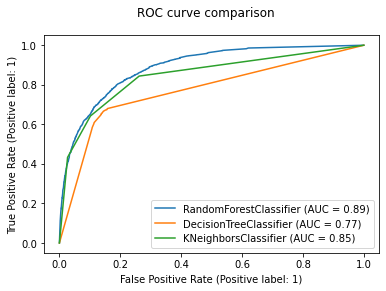

In [25]:
#ROC评估
#决策树：
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree 
# 模型训练
model = DecisionTreeClassifier().fit(X_train, y_train)

# 输出模型结果
predict_value = model.predict(X_test)
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
# svc = SVC(random_state=42)
# svc.fit(x_train, y_train)
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(3)
knn.fit(X_train, y_train)


# svc_disp = plot_roc_curve(svc, x_test, y_test)
# rfc_disp = plot_roc_curve(rfc, x_test, y_test, ax=svc_disp.ax_)
rfc_disp = plot_roc_curve(rfc, X_test, y_test)
desicion_tree = plot_roc_curve(clf, X_test, y_test,ax=rfc_disp.ax_)
knn_disp = plot_roc_curve(knn, X_test, y_test,ax=rfc_disp.ax_)


rfc_disp.figure_.suptitle("ROC curve comparison")
plt.show()

## Question:
### Q1:

### 决策树，SVM，KNN

In [ ]:
###Q2:
##上市公司信用风险预警

In [ ]:
# ##Q3：随机森林
# 采用了集成算法，准确度比单个算法要好
# 能够处理很高维度的数据，也能处理连续性的数据
# 训练速度开，可以用在大规模数据集上
# 抗过拟合能力强

In [ ]:
# # Q4: 随机森林
# 决策树个数很多时，需要的时间和空间大
# 是黑盒模型
# 噪音过大的样本集上，容易过拟合

In [ ]:
# Q5：
# 先数据量也有5万，比较大
# 然后数据集one-hot后的维度达到了103维，维度高。
# 而且最后显示结果auc也是最好的